In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,X-Men Origins: Wolverine,2009
1,Feng liu mi yue,1994
2,Expiation,1922
3,Snap Judgment,1917
4,Kill Command,2016


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [9]:
c = cast
c = c[(c['character'] == 'Superman') | (c['character'] == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack().fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [10]:
superman_years = c[c['Superman'] > c['Batman']].shape[0]
superman_years

13

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [11]:
batman_years = c[c['Superman'] < c['Batman']].shape[0]
batman_years

24

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

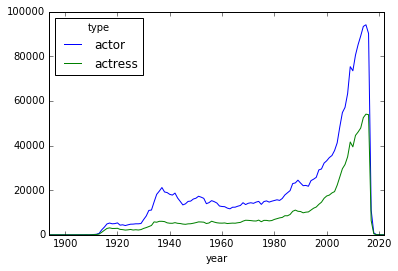

In [18]:
gendered_roles_per_year = cast.groupby(['year','type']).size().unstack().fillna(0)
gendered_roles_per_year.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

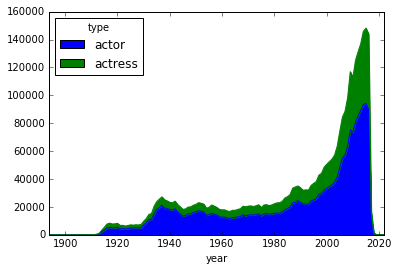

In [19]:
gendered_roles_per_year.plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.